# **DS411 - Predictive Analytics**
### **Instructor:**  Mr. Timothy Jonah Borromeo
#### **Section:** DS4A

#### **Group 2 Members:**
- Agbalog, Princess Honey
- Torralba, Colin Elijah
- Pocol, Czar Vic Israel
- Opalla, Erica

# **200K SHORT TEXTS FOR HUMOR DETECTION**

In [2]:
# Import Libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from contractions import fix  
from autocorrect import Speller  
import warnings
# Suppress all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
df = pd.read_csv("dataset.csv")
df

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False
...,...,...
199995,Conor maynard seamlessly fits old-school r&b h...,False
199996,How to you make holy water? you boil the hell ...,True
199997,How many optometrists does it take to screw in...,True
199998,Mcdonald's will officially kick off all-day br...,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    200000 non-null  object
 1   humor   200000 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.7+ MB


In [13]:
df.isna().sum()

text     0
humor    0
dtype: int64

In [14]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 3


In [15]:
text_lengths = df['text'].apply(len)
text_lengths

0         53
1         51
2         50
3         45
4         64
          ..
199995    73
199996    52
199997    89
199998    66
199999    86
Name: text, Length: 200000, dtype: int64

In [17]:
# Initialize tools
spell = Speller(lang='en')
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Handle misspellings
    text = spell(text)

    # Handle contractions
    text = fix(text)

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    return text

# Apply preprocessing function directly to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

In [18]:
df

,text,humor
0,joe biden rules out 2020 bid guys i am not run...,False
1,watch parish gave hitter whiplash with slow pitch,False
2,what do you call a turtle without its she will...,True
3,5 reasons the 2016 election feels so personal,False
4,paso police shot mexican migrant from behind n...,False
...,...,...
199995,conor wayward seamlessly fits oldschool rb hit...,False
199996,how to you make holy water you boil the hell o...,True
199997,how many optometrists does it take to screw in...,True
199998,mcdonalds will officially kick off allday brea...,False


Label Distribution:
humor
False    100000
True     100000
Name: count, dtype: int64


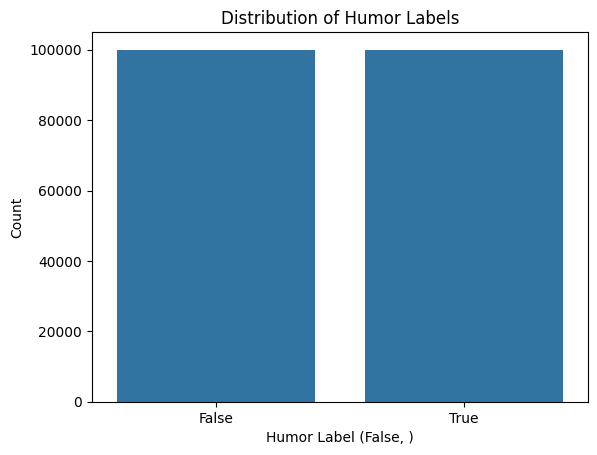

In [19]:
# Check distribution of humor labels
label_counts = df['humor'].value_counts()
print("Label Distribution:")
print(label_counts)

# Plot the label distribution
sns.countplot(x='humor', data=df)
plt.title('Distribution of Humor Labels')
plt.xlabel('Humor Label (False, )')
plt.ylabel('Count')
plt.show()

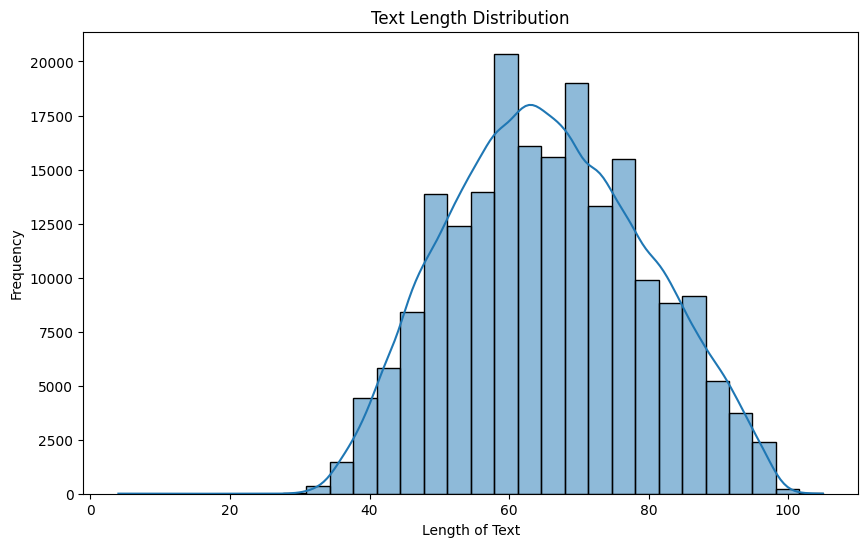


Text Length Statistics:
count    200000.00000
mean         65.58486
std          13.88060
min           4.00000
25%          55.00000
50%          65.00000
75%          76.00000
max         105.00000
Name: text, dtype: float64


In [20]:
# Calculate text lengths 
text_lengths = df['text'].apply(len)

# Plot text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(text_lengths, bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

# Display text length statistics
print("\nText Length Statistics:")
print(text_lengths.describe())

In [21]:
# Plot text length distribution by humor label
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_lengths', hue='humor', bins=30, kde=True)
plt.title('Text Length Distribution by Humor Label')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.legend(['Non-Humorous', 'Humorous'])
plt.show()

ValueError: Could not interpret value `text_lengths` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

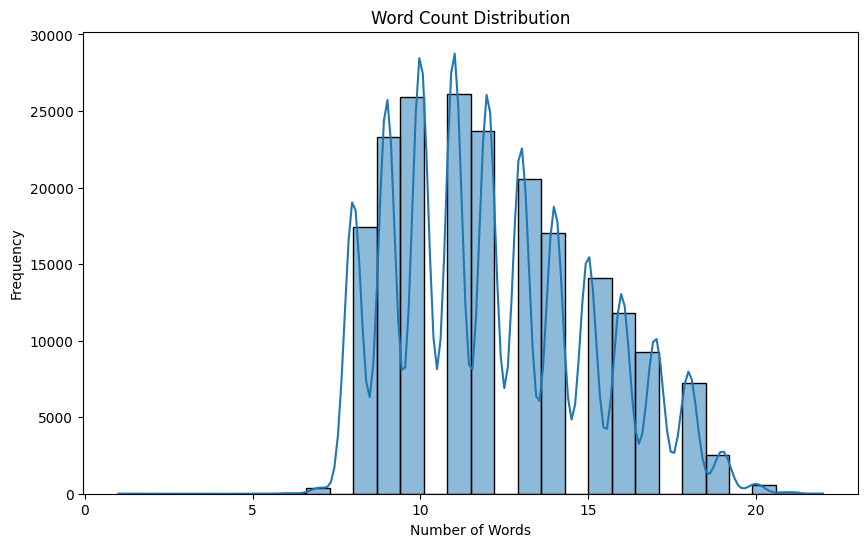


Word Count Statistics:
count    200000.000000
mean         12.187390
std           2.903871
min           1.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          22.000000
Name: word_count, dtype: float64


In [22]:
# Calculate word count
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for word count
print("\nWord Count Statistics:")
print(df['word_count'].describe())

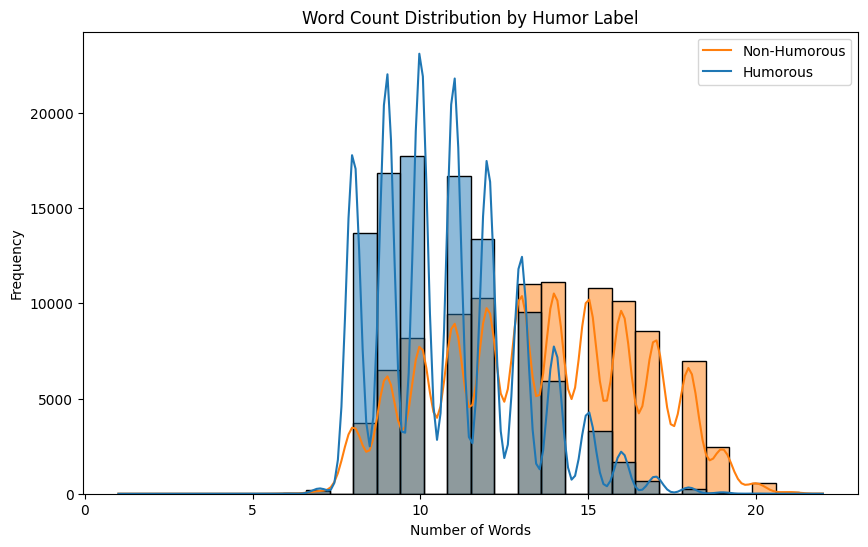

In [23]:
# Plot word count distribution by humor label
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='word_count', hue='humor', bins=30, kde=True)
plt.title('Word Count Distribution by Humor Label')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend(['Non-Humorous', 'Humorous'])
plt.show()

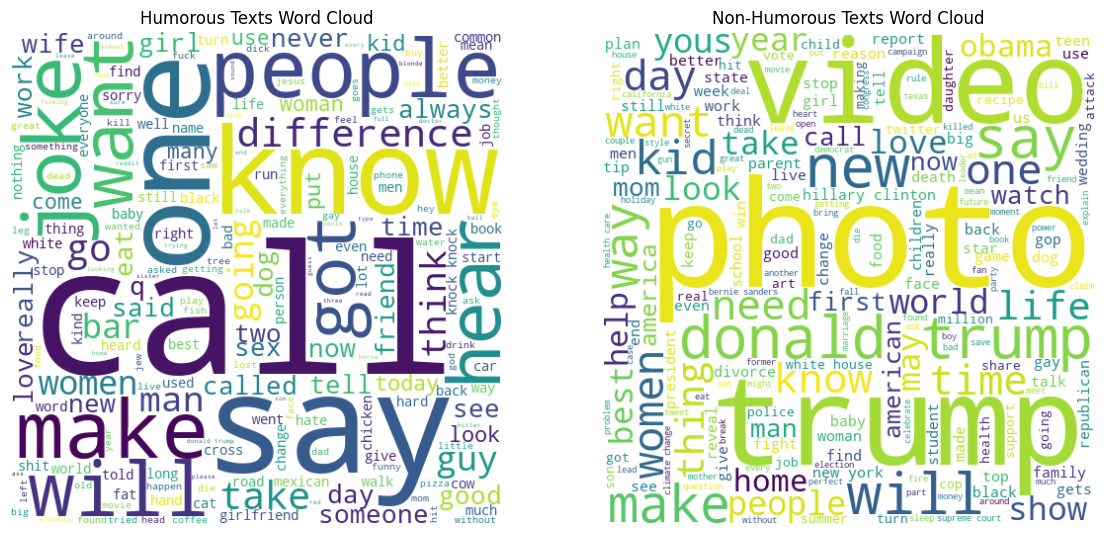

In [24]:
# Separate texts by label
humorous_texts = " ".join(df[df['humor'] == True]['text'])
non_humorous_texts = " ".join(df[df['humor'] == False]['text'])
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
humor_wordcloud = WordCloud(width=500, height=500, background_color='white').generate(humorous_texts)
plt.imshow(humor_wordcloud, interpolation='bilinear')
plt.title("Humorous Texts Word Cloud")
plt.axis('off')

plt.subplot(1, 2, 2)
non_humor_wordcloud = WordCloud(width=500, height=500, background_color='white').generate(non_humorous_texts)
plt.imshow(non_humor_wordcloud, interpolation='bilinear')
plt.title("Non-Humorous Texts Word Cloud")
plt.axis('off')
plt.show()

### Bag of Words

**Initialize the CountVectorizer**

In [108]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
# min_df=2 excludes words that appear in fewer than 2 documents.
# max_df=0.8 ignores words that appear in more than 80% of the documents.
# ngram_range=(1, 1) uses unigrams.
vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, ngram_range = (1, 1))  

**Fit and Transform the Data**

In [109]:
# Fit and transform the text data
X_bow = vectorizer.fit_transform(df['text'])

# Convert to a DataFrame for better readability
#bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())
bow_df = pd.DataFrame.sparse.from_spmatrix(X_bow, columns=vectorizer.get_feature_names_out())

# Display the first few rows
bow_df.head(3)

,00,000,001,007,00s,01,010,02,025,03,...,zootopia,zs,zsa,zucchini,zuckerberg,zuckerbergs,zum,zurich,zyzzyva,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Define Features and Target Variable**

In [110]:
# Features and target variable
X = df['text'].values # Base values
y = df['humor'].values  # Target variable

**Train-Test Split**

In [111]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

### TF IDF

In [112]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

In [113]:
# Use similar metrics from BOW
tf_vector = TfidfVectorizer(min_df = 2, max_df = 0.8, ngram_range=(1,1),norm = 'l2',smooth_idf = True, use_idf = True) 

In [114]:
# Fit and transform the data
X_tf = tf_vector.fit_transform(df['text'])

# Turn it into dataframe
tf_idf_df = pd.DataFrame.sparse.from_spmatrix(X_tf, columns=tf_vector.get_feature_names_out())

# Display the df
tf_idf_df.head(3)

,00,000,001,007,00s,01,010,02,025,03,...,zootopia,zs,zsa,zucchini,zuckerberg,zuckerbergs,zum,zurich,zyzzyva,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
X_tf.shape

(200000, 29541)

### Model Training

**Logistic Regression**

In [116]:
# Setup some values first!
# BOW Values
bow_x_train = vectorizer.fit_transform(X_train)
bow_x_test = vectorizer.transform(X_test)

# TF IDF Values
tf_x_train = tf_vector.fit_transform(X_train)
tf_x_test = tf_vector.transform(X_test)

In [117]:
# Setup Logistic Regression
# Create 2 Models, for bow and TFIDF
from sklearn.linear_model import LogisticRegression

LR_bow = LogisticRegression()
LR_tf = LogisticRegression()

In [118]:
# Fit the values into the models

# BOW
bow_fit = LR_bow.fit(bow_x_train,y_train)

# TFIDF
tf_fit = LR_tf.fit(tf_x_train,y_train)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Naive Bayes**

In [119]:
# Setup Naive Bayes models!
from sklearn.naive_bayes import MultinomialNB

# Bow Naive Bayes
bow_NB = MultinomialNB()

# TF IDF Naive Bayes
tf_NB = MultinomialNB()

In [120]:
# Fit the models!

# BOW
bow_NB_fit = bow_NB.fit(bow_x_train, y_train)

# TF IDF
tf_NB_fit = tf_NB.fit(tf_x_train, y_train)

## Evaluation

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**BOW EVALUATION**

In [127]:

bow_lr_score = bow_fit.score(bow_x_test, y_test)
bow_lr_pred = bow_fit.predict(bow_x_test)
bow_nb_score = bow_NB_fit.score(bow_x_test, y_test)
bow_nb_pred = bow_NB_fit.predict(bow_x_test)

print("BAG OF WORDS LOGISTIC REGRESSION: " )
print(f'Bag of Words Logistic Regression Score: {bow_lr_score}')
print("")
print(classification_report(y_test, bow_lr_pred))
print("")
print("Crosstab for logistic regression prediction")
confusion_matrix(y_test, bow_lr_pred)
pd.crosstab(y_test, bow_lr_pred, rownames = ["Actual"], colnames = ["Predicted"])

BAG OF WORDS LOGISTIC REGRESSION: 
Bag of Words Logistic Regression Score: 0.93118

              precision    recall  f1-score   support

       False       0.93      0.93      0.93     24919
        True       0.93      0.93      0.93     25081

    accuracy                           0.93     50000
   macro avg       0.93      0.93      0.93     50000
weighted avg       0.93      0.93      0.93     50000


Crosstab for logistic regression prediction


Predicted,False,True
Actual,,
False,23233,1686
True,1755,23326


In [128]:
print("BAG OF WORDS NAIVE BAYES: ")
print(f'Bag of Words Naive Bayes Score: {bow_nb_score}') 
print("")
print(classification_report(y_test, bow_nb_pred))
print("")
print("Crosstab for Naive Bayes prediction")
confusion_matrix(y_test, bow_nb_pred)
pd.crosstab(y_test, bow_nb_pred, rownames = ["Actual"], colnames = ["Predicted"])

BAG OF WORDS NAIVE BAYES: 
Bag of Words Naive Bayes Score: 0.91446

              precision    recall  f1-score   support

       False       0.94      0.89      0.91     24919
        True       0.89      0.94      0.92     25081

    accuracy                           0.91     50000
   macro avg       0.92      0.91      0.91     50000
weighted avg       0.92      0.91      0.91     50000


Crosstab for Naive Bayes prediction


Predicted,False,True
Actual,,
False,22133,2786
True,1491,23590


**TF IDF EVALUATION**

In [130]:
tf_lr_score = tf_fit.score(tf_x_test, y_test)
tf_lr_pred = tf_fit.predict(tf_x_test)

tf_nb_score = tf_NB_fit.score(tf_x_test, y_test)
tf_nb_pred = tf_NB_fit.predict(tf_x_test)

print("TF IDF LOGISTIC REGRESSION: ")
print(f'TF IDF Logistic Regression Score: {tf_lr_score}')
print("")
print(classification_report(y_test, tf_lr_pred))
print("")
print("Crosstab for Logistic Regression")
confusion_matrix(y_test, tf_lr_pred)
pd.crosstab(y_test, tf_lr_pred, rownames = ["Actual"], colnames = ["Predicted"])

TF IDF LOGISTIC REGRESSION: 
TF IDF Logistic Regression Score: 0.92458

              precision    recall  f1-score   support

       False       0.92      0.93      0.92     24919
        True       0.93      0.92      0.92     25081

    accuracy                           0.92     50000
   macro avg       0.92      0.92      0.92     50000
weighted avg       0.92      0.92      0.92     50000


Crosstab for Logistic Regression


Predicted,False,True
Actual,,
False,23097,1822
True,1949,23132


In [131]:
print("TF IDF NAIVE BAYES: ")
print(f'TF IDF Naive Bayes Score: {tf_nb_score}')
print("")
print(classification_report(y_test, tf_nb_pred))
print("")
print("Crosstab for Naive Bayes")
confusion_matrix(y_test, tf_nb_pred)
pd.crosstab(y_test, tf_nb_pred, rownames = ["Actual"], colnames = ["Predicted"])

TF IDF NAIVE BAYES: 
TF IDF Naive Bayes Score: 0.91216

              precision    recall  f1-score   support

       False       0.93      0.89      0.91     24919
        True       0.89      0.94      0.91     25081

    accuracy                           0.91     50000
   macro avg       0.91      0.91      0.91     50000
weighted avg       0.91      0.91      0.91     50000


Crosstab for Naive Bayes


Predicted,False,True
Actual,,
False,22098,2821
True,1571,23510
